In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  precision_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In e-mail spam detection, it is really important to avoid false positives.
Therefore we will be using precision_score as our evaluation metric.

Reading in the data. This dataset contains **5572** instances of spam and ham(non-spam) emails in a csv file

In [3]:
dataset = pd.read_csv('./spam.csv')

dataset["target"] = np.where(dataset["target"] == 'spam', 1, 0)

dataset.head(10)

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


Splitting the data into train and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['target'], random_state= 0)

Using **TFIDF Vectorizer** : Transforms text to feature vectors to be fed into the estimator

In [15]:
#1 :: Naive Bayes Classifier using TFIDF Classifier


vectorizer_tfidf = TfidfVectorizer()
X_train_transformed_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_transformed_tfidf = vectorizer_tfidf.transform(X_test)

clf_tfidf = MultinomialNB(alpha = 0.01)
clf_tfidf.fit(X_train_transformed_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_transformed_tfidf)

ps_nb_tfidf = precision_score(y_test, y_pred_tfidf)
ras_nb_tfidf =  roc_auc_score(y_test, y_pred_tfidf)

print("Precision Score MNB", precision_score(y_test, y_pred_tfidf))
print("AUC Score MNB", roc_auc_score(y_test, y_pred_tfidf))

Precision Score MNB 1.0
AUC Score MNB 0.9517766497461929


In [17]:

#2 :: Support Vector Classifier using TFIDF Vectorizer


vectorizer_svc_tfidf = TfidfVectorizer()
X_train_transformed_tfidf_svc = vectorizer_svc_tfidf.fit_transform(X_train)
X_test_transformed_tfidf_svc  = vectorizer_svc_tfidf.transform(X_test)

clf_svc = SVC(C = 10000)
clf_svc.fit(X_train_transformed_tfidf_svc, y_train)
y_pred_svc = clf_svc.predict(X_test_transformed_tfidf_svc)

ps_svc_tfidf = precision_score(y_test, y_pred_svc)
ras_svc_tfidf =  roc_auc_score(y_test, y_pred_svc)

print("Precision Score SVC", precision_score(y_test, y_pred_svc))
print("AUC Score SVC",roc_auc_score(y_test, y_pred_svc))

Precision Score SVC 1.0
AUC Score SVC 0.9365482233502538


In [18]:
#3 :: Logistic Regression using TFIDF vectorizer


vectorizer_lr = TfidfVectorizer()
X_train_transformed_lr = vectorizer_lr.fit_transform(X_train)
X_test_transformed_lr  = vectorizer_lr.transform(X_test)

clf_lr = LogisticRegression(C = 100)
clf_lr.fit(X_train_transformed_lr, y_train)
y_pred_lr = clf_lr.predict(X_test_transformed_lr)

ps_lr_tfidf = precision_score(y_test, y_pred_lr)
ras_lr_tfidf =  roc_auc_score(y_test, y_pred_lr)

print("Precision Score LR", precision_score(y_test, y_pred_lr))
print("AUC Score LR",roc_auc_score(y_test, y_pred_lr))

Precision Score LR 0.9836065573770492
AUC Score LR 0.9555986112761659


In [19]:
#4 Neural Networks :: L-BFGS Algorithm using TFIDF vectorizer


vectorizer_nn = TfidfVectorizer()
X_train_transformed_nn = vectorizer_nn.fit_transform(X_train)
X_test_transformed_nn = vectorizer_nn.transform(X_test)

clf_nn = MLPClassifier(solver = 'lbfgs', random_state= 0 , hidden_layer_sizes = [10, 20, 20, 10])
clf_nn.fit(X_train_transformed_nn, y_train)
y_pred_nn = clf_nn.predict(X_test_transformed_nn)

ps_nn_tfidf = precision_score(y_test, y_pred_nn)
ras_nn_tfidf =  roc_auc_score(y_test, y_pred_nn)

print("Precision Score NN", precision_score(y_test, y_pred_nn))
print("AUC Score NN", roc_auc_score(y_test, y_pred_nn))

Precision Score NN 0.9497206703910615
AUC Score NN 0.9277095394122541


In [86]:
#5 Decision Tree(Gradient Boosted) using TFIDF vectorizer

vectorizer_nn = TfidfVectorizer()
X_train_transformed_dt = vectorizer_nn.fit_transform(X_train)
X_test_transformed_dt = vectorizer_nn.transform(X_test)

tree = GradientBoostingClassifier(max_depth = 5, random_state = 2, learning_rate = 0.01)
tree.fit(X_train_transformed_dt, y_train)
y_pred_dt = tree.predict(X_test_transformed_dt)

ps_dt_tfidf = precision_score(y_test, y_pred_dt)
ras_dt_tfidf =  roc_auc_score(y_test, y_pred_dt)

print("Precision Score", ps_dt_tfidf)
print("ROC_AUC_Score",ras_dt_tfidf)





Precision Score 0.9827586206896551
ROC_AUC_Score 0.7885039811215048


Using **Count Vectorizer**: Count Vectorizer implements both tokenization and occurence counting in a single class

In [30]:
# 1 :: Naive Bayes Multinomial Classifierm using Count Vectorizer


vectorizer_count = CountVectorizer()
X_train_transformed_count = vectorizer_count.fit_transform(X_train)
X_test_transformed_count = vectorizer_count.transform(X_test)

clf_count = MultinomialNB(alpha = 0.1)
clf_count.fit(X_train_transformed_count, y_train)
y_pred_count = clf_count.predict(X_test_transformed_count)

ps_nb_count = precision_score(y_test, y_pred_count)
ras_nb_count =  roc_auc_score(y_test, y_pred_count)

print("Precision Score: NB", precision_score(y_test, y_pred_count))
print("AUC Score NB", roc_auc_score(y_test, y_pred_count))

Precision Score: NB 1.0
AUC Score NB 0.9720812182741116


In [20]:
#2 :: Support Vector Classifier using Count Vectorizer


vectorizer_svcCount = CountVectorizer()
X_train_transformedCount_svc = vectorizer_svcCount.fit_transform(X_train)
X_test_transformedCount_svc  = vectorizer_svcCount.transform(X_test)

clf_svc = SVC(C = 10000)
clf_svc.fit(X_train_transformedCount_svc, y_train)
y_pred_svc = clf_svc.predict(X_test_transformedCount_svc)

ps_svc_count = precision_score(y_test, y_pred_svc)
ras_svc_count =  roc_auc_score(y_test, y_pred_svc)


print("Precision Score SVC", precision_score(y_test, y_pred_svc))
print("AUC Score SVC",roc_auc_score(y_test, y_pred_svc))

Precision Score SVC 1.0
AUC Score SVC 0.934010152284264


In [21]:
#3 :: Logistic Regression using Count vectorizer


vectorizer_lr =CountVectorizer()
X_train_transformed_lr = vectorizer_lr.fit_transform(X_train)
X_test_transformed_lr  = vectorizer_lr.transform(X_test)

clf_lr = LogisticRegression(C = 100)
clf_lr.fit(X_train_transformed_lr, y_train)
y_pred_lr = clf_lr.predict(X_test_transformed_lr)

ps_lr_count = precision_score(y_test, y_pred_lr)
ras_lr_count =  roc_auc_score(y_test, y_pred_lr)

print("Precision Score LR", precision_score(y_test, y_pred_lr))
print("AUC Score LR",roc_auc_score(y_test, y_pred_lr))

Precision Score LR 0.9943181818181818
AUC Score LR 0.9437443763475543


In [22]:
#6 Neural Networks :: L-BFGS Algorithm


vectorizer_nn =CountVectorizer()
X_train_transformed_nn = vectorizer_nn.fit_transform(X_train)
X_test_transformed_nn = vectorizer_nn.transform(X_test)

clf_nn = MLPClassifier(solver = 'lbfgs', random_state= 0 , hidden_layer_sizes = [10, 20, 20, 10])
clf_nn.fit(X_train_transformed_nn, y_train)
y_pred_nn = clf_nn.predict(X_test_transformed_nn)

ps_nn_count = precision_score(y_test, y_pred_nn)
ras_nn_count =  roc_auc_score(y_test, y_pred_nn)

print("Precision Score NN", precision_score(y_test, y_pred_nn))
print("AUC Score NN", roc_auc_score(y_test, y_pred_nn))

Precision Score NN 0.9567567567567568
AUC Score NN 0.945894097074852


In [87]:
#5 Decision Tree(Gradient Boosted) using Count vectorizer

vectorizer_nn = CountVectorizer()
X_train_transformed_dt = vectorizer_nn.fit_transform(X_train)
X_test_transformed_dt = vectorizer_nn.transform(X_test)

tree = GradientBoostingClassifier(max_depth = 5, random_state = 2, learning_rate = 0.01)
tree.fit(X_train_transformed_dt, y_train)
y_pred_dt = tree.predict(X_test_transformed_dt)

ps_dt_count = precision_score(y_test, y_pred_dt)
ras_dt_count =  roc_auc_score(y_test, y_pred_dt)

print("Precision Score", ps_dt_count)
print("ROC_AUC_Score",ras_dt_count)


Precision Score 1.0
ROC_AUC_Score 0.7817258883248731


**Analysing performance** of various models:

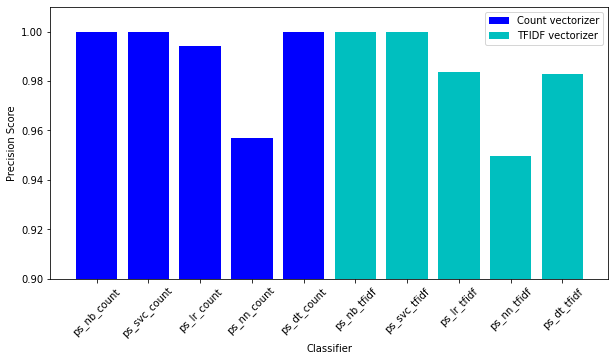

In [83]:
plt.figure(figsize = ((10,5)))
plt.bar(["ps_nb_count","ps_svc_count", "ps_lr_count" ,"ps_nn_count", "ps_dt_count"],
        [ps_nb_count,ps_svc_count,ps_lr_count,ps_nn_count, ps_dt_count], label = 'Count vectorizer', color = 'b')
plt.bar(["ps_nb_tfidf","ps_svc_tfidf", "ps_lr_tfidf" ,"ps_nn_tfidf", "ps_dt_tfidf"],
        [ps_nb_tfidf,ps_svc_tfidf,ps_lr_tfidf,ps_nn_tfidf, ps_dt_tfidf], label = 'TFIDF vectorizer', color = 'c')
plt.xlabel("Classifier")
plt.ylabel("Precision Score")
plt.ylim(0.9, 1.01)
plt.xticks(rotation = 45)
plt.legend()


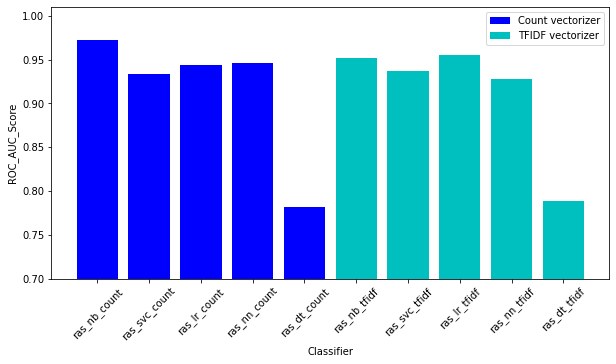

In [85]:
plt.figure(figsize = ((10,5)))
plt.bar(["ras_nb_count","ras_svc_count", "ras_lr_count" ,"ras_nn_count", "ras_dt_count"],
        [ras_nb_count,ras_svc_count,ras_lr_count,ras_nn_count, ras_dt_count], label = 'Count vectorizer', color = 'b')
plt.bar(["ras_nb_tfidf","ras_svc_tfidf", "ras_lr_tfidf" ,"ras_nn_tfidf", "ras_dt_tfidf"],
        [ras_nb_tfidf,ras_svc_tfidf,ras_lr_tfidf,ras_nn_tfidf, ras_dt_tfidf], label = 'TFIDF vectorizer', color = 'c')
plt.xlabel("Classifier")
plt.ylabel("ROC_AUC_Score")
plt.ylim(0.7, 1.01)
plt.xticks(rotation = 45)
plt.legend()

**Performance Analysis**

Precision Scores:
Multinomial Naive Bayes Classifier
  1.   Tfidf Vectorizer : 1.0 
  2.   Count Vectorizer : 1.0

Support Vector Classifier:
  1.   Tfidf Vectorizer : 1.0 
  2.   Count Vectorizer : 1.0

Logistic Regression:
  1.   Tfidf Vectorizer : 0.983
  2.   Count Vectorizer : 0.994

Neural Network (MLP):
  1.   Tfidf Vectorizer : 0.949
  2.   Count Vectorizer : 0.956

Gradient Boosted Decision Tree:
  1.   Tfidf Vectorizer : 0.982
  2.   Count Vectorizer : 1.0



ROC_AUC Scores:

Multinomial Naive Bayes Classifier: 
  1.   Tfidf Vectorizer : 0.951
  2.   Count Vectorizer : 0.972

Support Vector Classifier:
  1.   Tfidf Vectorizer : 0.936
  2.   Count Vectorizer : 0.934

Logistic Regression:
  1.   Tfidf Vectorizer : 0.955
  2.   Count Vectorizer : 0.943

Neural Network (MLP):
  1.   Tfidf Vectorizer : 0.927
  2.   Count Vectorizer : 0.945

Gradient Boosted Decision Tree:
  1.   Tfidf Vectorizer : 0.788
  2.   Count Vectorizer : 0.781









***CONCLUSION***

From this analysis on this particular dataset, **Multinomial Naive Bayes Classifier(using Count vectorizer)** is the best performing classifier